In [1]:
%matplotlib notebook

See https://gist.github.com/smidm/b398312a13f60c24449a2c7533877dc0

In [2]:
import numpy as np
import pylab as plt
import matplotlib.patches
from ipywidgets import interact, interactive, fixed, interact_manual

from pyinverse.ellipse import ellipse_bb, Ellipse
from pyinverse.axis import RegularAxis
from pyinverse.grid import RegularGrid

In [3]:
def plot_ellipse(x=50, y=50, major=30, minor=10, angle_deg=45):
    plt.figure(2)
    plt.clf()
    ax = plt.gca()
    ax.add_patch(matplotlib.patches.Ellipse((x, y), major, minor, angle_deg, 
                 edgecolor='r',
                 facecolor='none'))
    min_x, min_y, max_x, max_y = ellipse_bb(x, y, major/2, minor/2, angle_deg)
    plt.vlines([max_x, min_x], 0, 100)
    plt.hlines([max_y, min_y], 0, 100)
    plt.show()

<IPython.core.display.Javascript object>


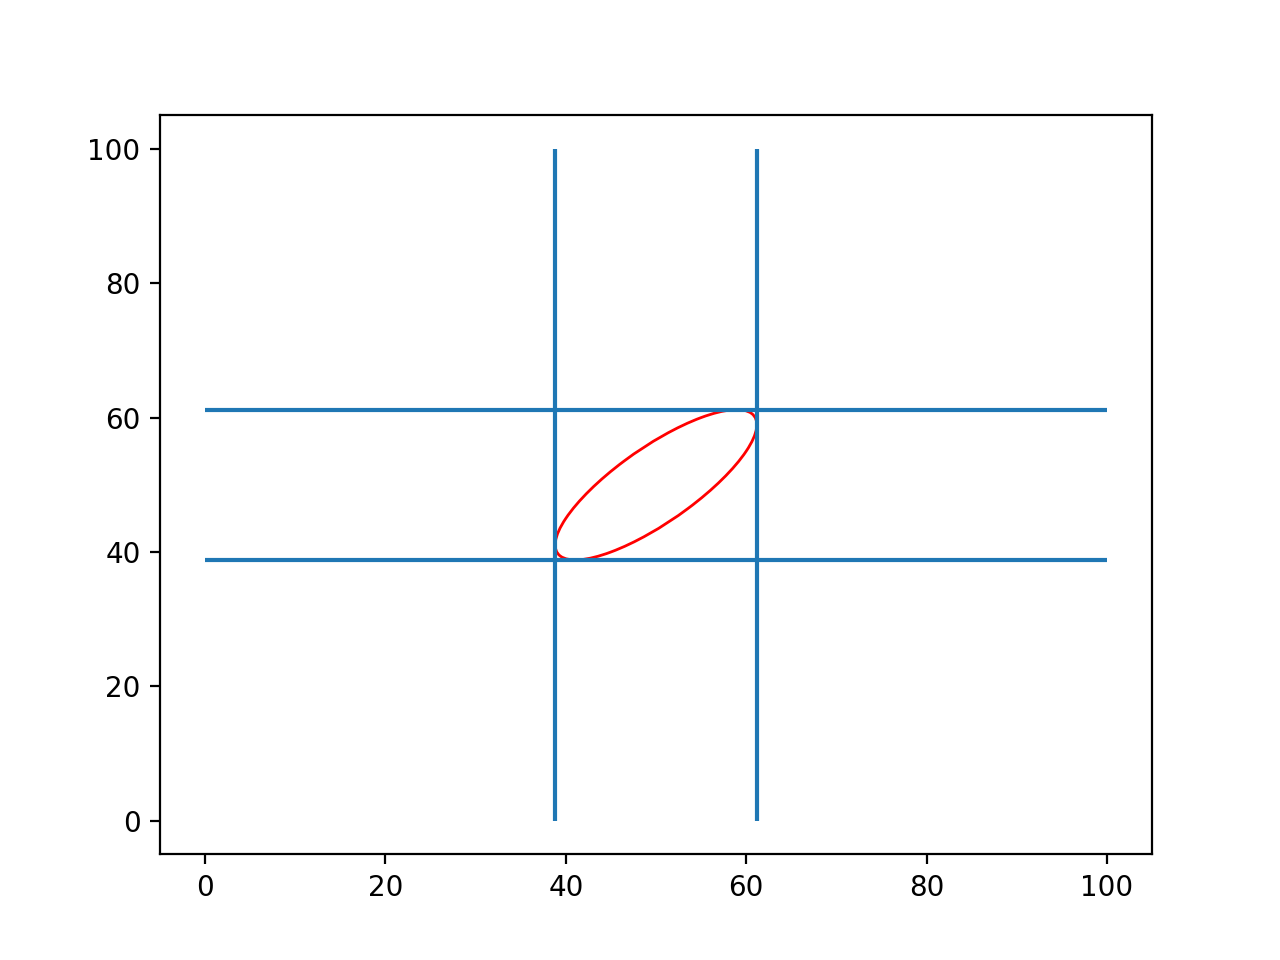

In [4]:
plot_ellipse()

interactive_plot = interactive(plot_ellipse, 
                               x=fixed(50), 
                               y=fixed(50),
                               major=(0, 40),
                               minor=(0, 40),
                               angle_deg=(-180, 180),
                              )
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

In [5]:
#e1 = Ellipse(.01, .2100, .2500,   0,    .35,    0)
#e1 = Ellipse(-.2, .1600, .4100, -.22,    0,     18)
e1 = Ellipse(-.2, .1100, .3100,  .22,    0,    -18)
#e1 = Ellipse(1, 0.69/2, 0.92/2, 0.25, 0.15, 25)
#e1 = Ellipse(1, 0.69, 0.92, 0, 0, 0)
#e1 = Ellipse(-0.8, 0.6624, 0.8740, 0, -0.0184, 0)
#e1 = Ellipse(-.2, .1100, .3100,  .22,    0,    -18)
e1.bounds

(0.07815048031011096,
 -0.2967805818508816,
 0.36184951968988904,
 0.2967805818508816)

In [6]:
N1 = N2 = 32
grid = RegularGrid(RegularAxis.linspace(-1, 1, N1), 
                   RegularAxis.linspace(-1, 1, N2))

In [7]:
min_x, min_y, max_x, max_y = e1.bounds

In [8]:
J1 = max(np.argwhere(grid.axis_x.borders[:-1] >= min_x)[0][0] - 1, 0)
J2 = min(np.argwhere(grid.axis_x.borders[1:] <= max_x)[-1][0] + 1, grid.axis_x.N - 1)

I1 = max(np.argwhere(grid.axis_y.borders[:-1] >= min_y)[0][0] - 1, 0)
I2 = min(np.argwhere(grid.axis_y.borders[1:] <= max_y)[-1][0] + 1, grid.axis_y.N - 1)

<IPython.core.display.Javascript object>


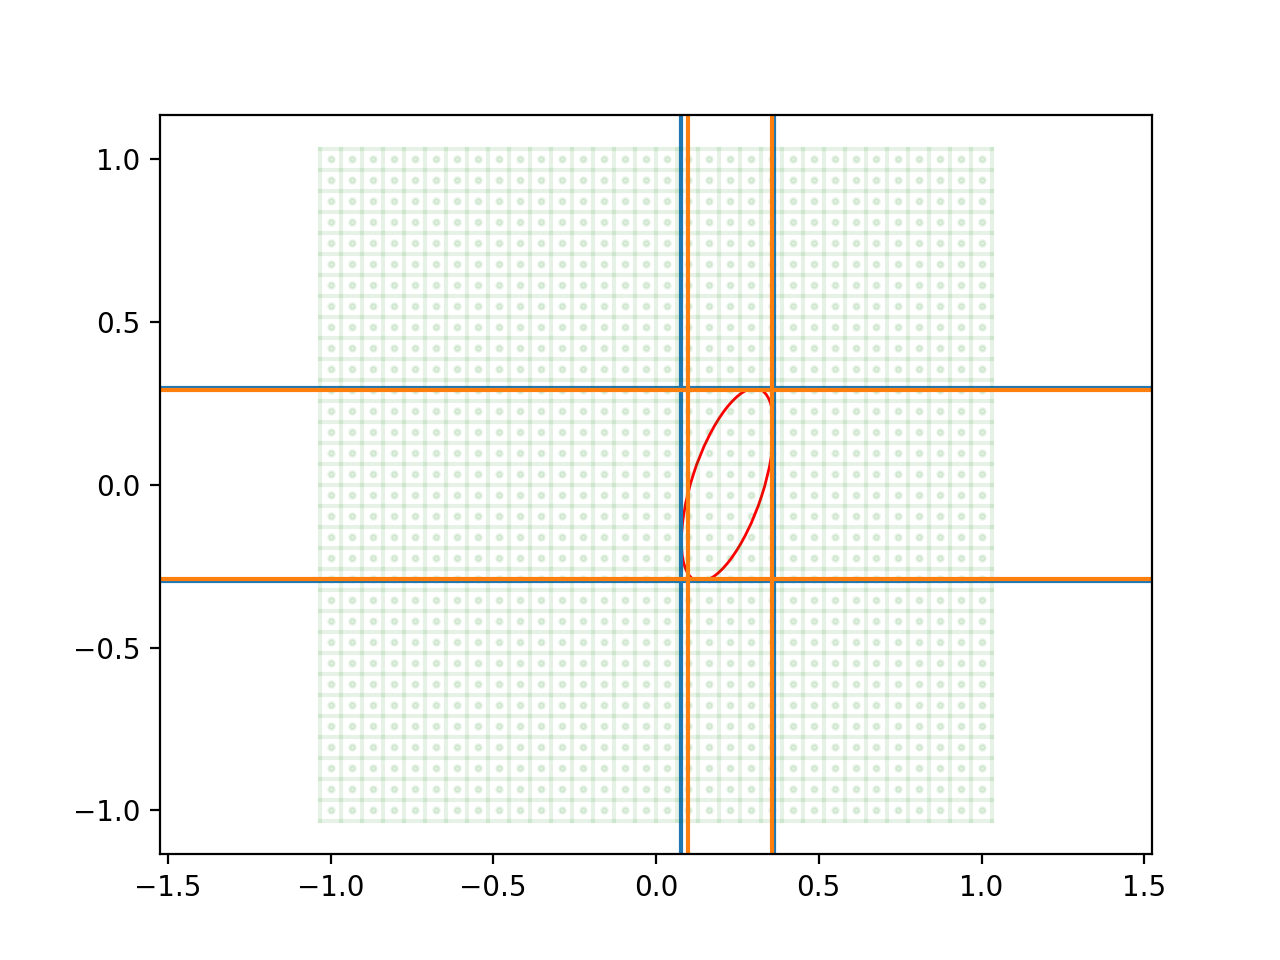

In [9]:
ALPHA = 0.1

plt.figure()
ax = plt.gca()
ax.add_patch(matplotlib.patches.Ellipse((e1.x0, e1.y0), 2*e1.a, 2*e1.b, e1.phi_deg, 
             edgecolor='r',
             facecolor='none'))
plt.axvline(min_x)
plt.axvline(max_x)
plt.axhline(min_y)
plt.axhline(max_y)
# plot grid centers
plt.scatter(*[x.flat for x in np.meshgrid(list(grid.axis_x), list(grid.axis_y))], c='g', s=4, alpha=ALPHA)
# plot grid edges
for x in grid.axis_x.borders:
    plt.plot([x, x], [grid.axis_y.borders[0], grid.axis_y.borders[-1]], c='g', alpha=ALPHA)
for y in grid.axis_y.borders:
    plt.plot([grid.axis_x.borders[0], grid.axis_x.borders[-1]], [y, y], c='g', alpha=ALPHA)

plt.axvline(grid.axis_x[J1], c='C1')
plt.axvline(grid.axis_x[J2], c='C1')
plt.axhline(grid.axis_x[I1], c='C1')
plt.axhline(grid.axis_x[I2], c='C1')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis('equal');

In [10]:
J1 = max(np.argwhere(grid.axis_x.borders[:-1] >= min_x)[0][0] - 1, 0)
J2 = min(np.argwhere(grid.axis_x.borders[1:] <= max_x)[-1][0] + 1, grid.axis_x.N - 1)

In [11]:
J1, J2

(17, 21)

In [12]:
I1 = max(np.argwhere(grid.axis_y.borders[:-1] >= min_y)[0][0] - 1, 0)
I2 = min(np.argwhere(grid.axis_y.borders[1:] <= max_y)[-1][0] + 1, grid.axis_y.N - 1)

In [13]:
I1, I2

(11, 20)

In [14]:
min_y, max_y

(-0.2967805818508816, 0.2967805818508816)